## **Underfitting**
- Underfitting occurs when an estimator (in our case ML model) is not flexible enough to capture the underlying trends in the observed data.
- Underfitting generally results when model is unable to learn through features. Few causes can be: bad optimizer, incorrect loss function, not enough training iterations


## **Overfitting**
- Overfitting occurs when an estimator is too flexible, allowing it to capture illusory trends in the data. These illusory trends are often the result of the noise in the observations.
- To identify overfitting, we can observe a very high accuracy/f-score on training dataset and low accuracy/f-score on test dataset.
- It can also be observed by plotting train and validation loss with iterations. In case of overfitting, Training loss will decrease with iterations and validation loss would start to increase after some iterations indicating that the model is overfitting.

## **Experiment**
We sample 50 independent data sets based on an underlying function, then we fit the parameters for the 3 polynomial functions(of different degrees) individually.

In the generated plots, the lightly-colored curves in each of the three plots below are an individual polynomial model fit $g(x)$ to one of the 50 sampled data sets. The darkly-colored curve in each plot is the average over the 50 individual fits $E[g(x)]$. The dark curve(black) is the true, underlying function $f(x)$.

Text(0.5, 0.98, 'Model Fits Given Random Samples Around f(x)')

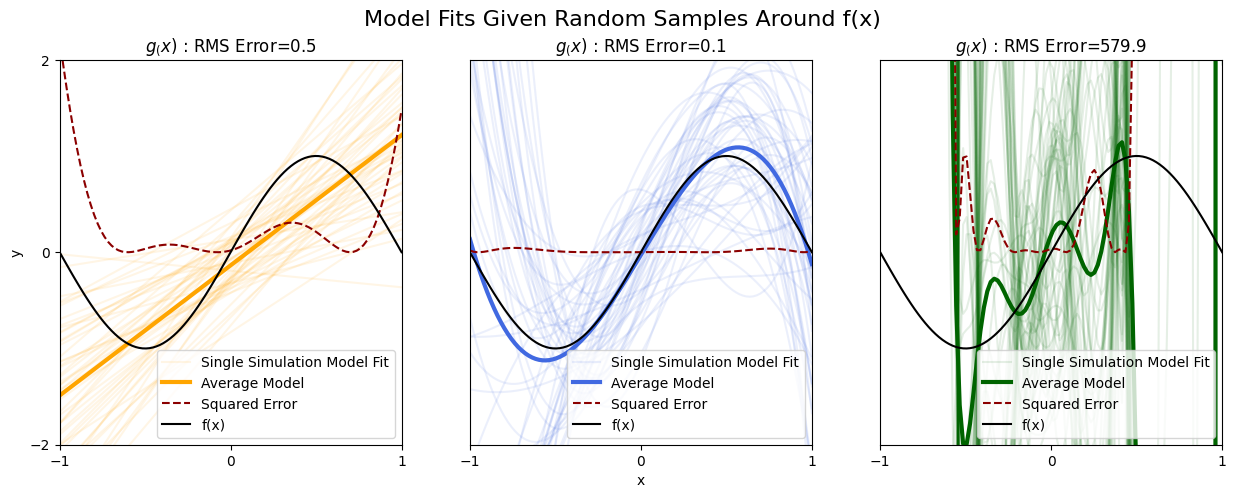

In [1]:
import warnings
warnings.filterwarnings('ignore')

from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from statistics import mean
np.random.seed(123)
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen']
LEGEND_FONTSIZE = 14
TITLE_FONTISIZE = 16
N_OBSERVATIONS = 10
NOISE_STD = 1.

polynomial_degrees = [1, 3, 10]

x = 2 * (np.random.rand(N_OBSERVATIONS) - .5)
x_grid = np.linspace(-1, 1, 100)
def f(x):
    """Base function"""
    return np.sin(x * np.pi)


def sample_fx_data(shape, noise_std=NOISE_STD):
    return f(x) + np.random.randn(*shape) * noise_std


def plot_fx_data(y=None):
    """Plot f(x) and noisy samples"""
    y = y if y is not None else sample_fx_data(x.shape)
    fig, axs = plt.subplots(figsize=(6, 6))
    plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)')
    plt.scatter(x, y, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors='none', label='y')


n_simulations = 50
simulation_fits = defaultdict(list)
for sim in range(n_simulations):
    # Start from same samples
    y_simulation = sample_fx_data(x.shape)
    for degree in polynomial_degrees:
        # Note: we should get an overconditioned warning
        # for degree 10 because of extreme overfitting
        theta_tmp = np.polyfit(x, y_simulation, degree)
        simulation_fits[degree].append(np.polyval(theta_tmp, x_grid))


def error_function(pred, actual):
    return (pred - actual) ** 2

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ii, degree in enumerate(polynomial_degrees):
    plt.sca(axs[ii])
    for jj, fit in enumerate(simulation_fits[degree]):
        label = 'Single Simulation Model Fit' if jj == 0 else None
        plt.plot(x_grid, fit, color=POLYNOMIAL_FIT_COLORS[ii], alpha=.1, label=label)

    average_fit = np.array(simulation_fits[degree]).mean(0)
    squared_error = error_function(average_fit, f(x_grid))
    rms = np.sqrt(mean(squared_error))

    # Plot values and make the graph look good
    plt.plot(x_grid, average_fit, color=POLYNOMIAL_FIT_COLORS[ii], linewidth=3, label='Average Model')
    plt.plot(x_grid, squared_error, '--', color=ERROR_COLOR, label='Squared Error')
    plt.plot(x_grid, f(x_grid), color='black', label='f(x)')
    plt.yticks([])
    if ii == 1:
        plt.xlabel('x')
    elif ii == 0:
        plt.ylabel('y')
        plt.yticks([-2, 0, 2])

    plt.xlim([-1, 1])
    plt.ylim([-2, 2])
    plt.xticks([-1, 0, 1])
    plt.title(f"$g_(x)$ : RMS Error={np.round(rms, 1)}")
    plt.legend(loc='lower right')
plt.suptitle('Model Fits Given Random Samples Around f(x)', fontsize=TITLE_FONTISIZE)

## Bias
$\text{Bias}= E[g(x)]−f(x)$

Bias describes how much the average estimator fit $E[g(x)]$ over many datasets deviates from the value of the actual underlying target function

- Degree=1: We see that for the estimator $g_1(x)$ (light orange curves in the leftmost plot), model fits do not vary too dramatically from data set to data set. Thus the averaged estimator fit over all the data sets (dark orange curve), formally written as $E[g(x)]$, is similar (in terms of slope and vertical offset) to each of the individual fits. High Bias.

- Degree=3: the estimator $g_3(x)$ has the average estimator $E[g_3(x)]$
 (dark blue curve) accurately approximates the true function $f(x)$, indicating that the estimator $g_3(x)$ has low bias.

- Degree=10: What's your guess here??

## Variance
variance is the expected (i.e. average) squared difference between any single dataset-dependent estimate of $[g(x)]$ and the average value of $[g(x)]$ estimated over all datasets, $E[[g(x)]]$


$\text{Variance}=E[(g(x) −E[g(x)])^2]$



- We see that for the estimator $g_1(x)$ has low variance as each individual $g_1(x)$ is fairly similar across datasets.

- estimator $g_{10}(x)$ (green curves; right most plot), we see that each individual model fit varies dramatically from one data set to another. Therefore, HIGH VARIANCE.

## Bias Variance Tradeoff

- With the above example we can identify that if our first model is too simple and has very few polynomial degrees then it may have high bias and low variance.

- On the other hand the third model has large polynomial degrees, and has high variance and low bias.

- So we need to find the right/good balance without overfitting and underfitting the data. This can be observed in the middle model and this is called Bias Variance Tradeoff.

## **Linear Separability**
---

*  Generally speaking, in Machine Learning and before running any type of classifier, it is important to understand the data we are dealing with to determine which algorithm to start with, and which parameters we need to adjust that are suitable for the task.
* There are several classification algorithms that are designed to separate the data by constructing a linear decision boundary (hyperplane) to divide the classes and with that comes the assumption: that the data is linearly separable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
data = datasets.load_iris()

#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Figure size 640x480 with 0 Axes>

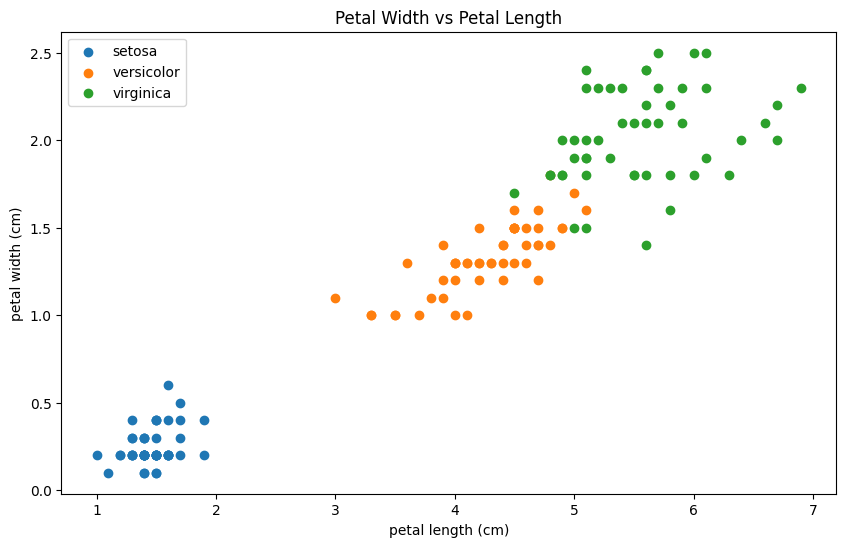

In [3]:
# Visualize the distribution of Petal Width vs Petal Length

plt.clf()
plt.figure(figsize = (10, 6))
names = data.target_names
colors = ['b','r','g']
label = (data.target).astype(np.int)
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i])
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

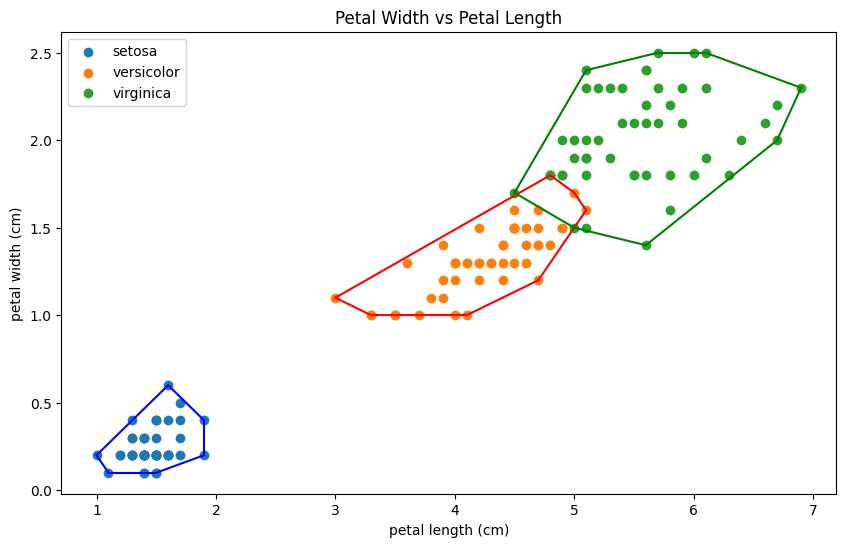

In [4]:
# Visualize the distribution of Petal Width vs Petal Length and draw the convex hull

from scipy.spatial import ConvexHull

plt.clf()
plt.figure(figsize = (10, 6))
names = data.target_names
label = (data.target).astype(np.int)
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values

    # Get the convex hull for each bucket and plot the bucket
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i])

    # Plot the convex hull boundaries for each bucket
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])
plt.legend()
plt.show()

## **Exercise**

---

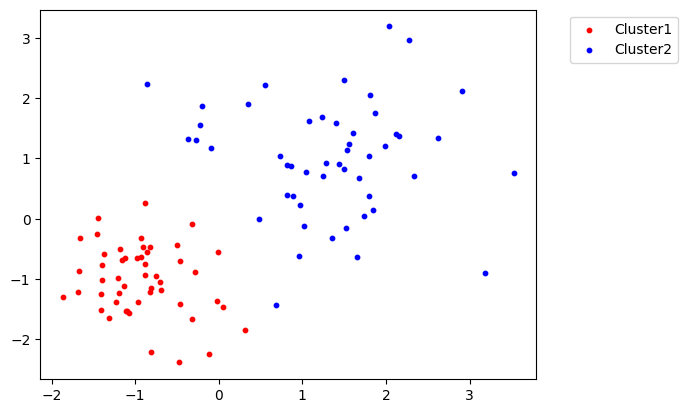

In [5]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


centers = [(-1, -1), (1, 1)]
cluster_std = [0.6, 1]

# Using sklearn's synthetic dataset generator
X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

cluster_a = np.array([list(c) for c in zip(X[y == 0, 0], X[y == 0, 1])])
cluster_b = np.array([list(c) for c in zip(X[y == 1, 0], X[y == 1, 1])])

plt.scatter(cluster_a[:,0], cluster_a[:,1], color="red", s=10, label="Cluster1")
plt.scatter(cluster_b[:,0], cluster_b[:,1], color="blue", s=10, label="Cluster2")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

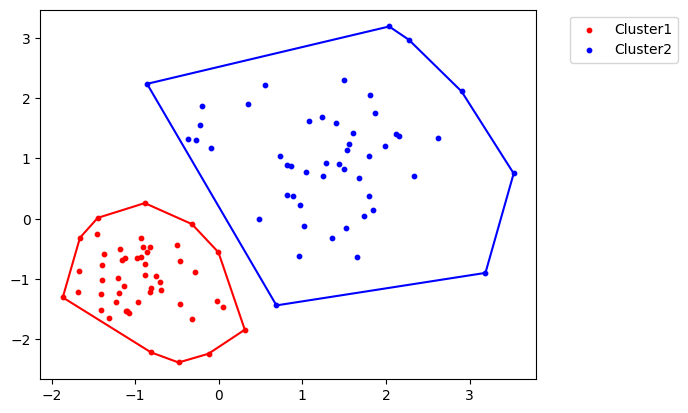

In [6]:
# Get the convex hull for cluster_a and plot cluster_a
hull_a = ConvexHull(cluster_a)
plt.scatter(cluster_a[:, 0], cluster_a[:, 1], s=10, color="red", label="Cluster1")

# Plot the convex hull boundaries for cluster_a
for j in hull_a.simplices:
    plt.plot(cluster_a[j,0], cluster_a[j,1], 'red')


# Get the convex hull for cluster_b and plot cluster_b
hull_b = ConvexHull(cluster_b)
plt.scatter(cluster_b[:, 0], cluster_b[:, 1], s=10, color="blue", label="Cluster2")


# Plot the convex hull boundaries for cluster_b
for j in hull_b.simplices:
    plt.plot(cluster_b[j,0], cluster_b[j,1], 'blue')

plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

For a linearly separable dataset, the convex hull of the two clusters will not intersect, which is what you should be seeing when you generate the graph above.

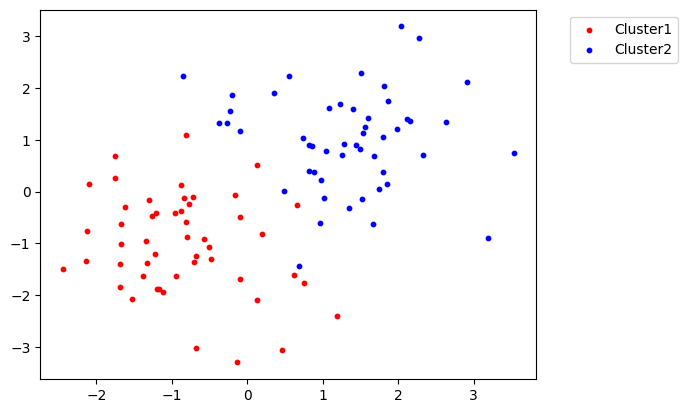

In [7]:
centers = [(-1, -1), (1, 1)]
cluster_std = [1, 1]

# Using sklearn's synthetic dataset generator
X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

cluster_a = np.array([list(c) for c in zip(X[y == 0, 0], X[y == 0, 1])])
cluster_b = np.array([list(c) for c in zip(X[y == 1, 0], X[y == 1, 1])])

plt.scatter(cluster_a[:,0], cluster_a[:,1], color="red", s=10, label="Cluster1")
plt.scatter(cluster_b[:,0], cluster_b[:,1], color="blue", s=10, label="Cluster2")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

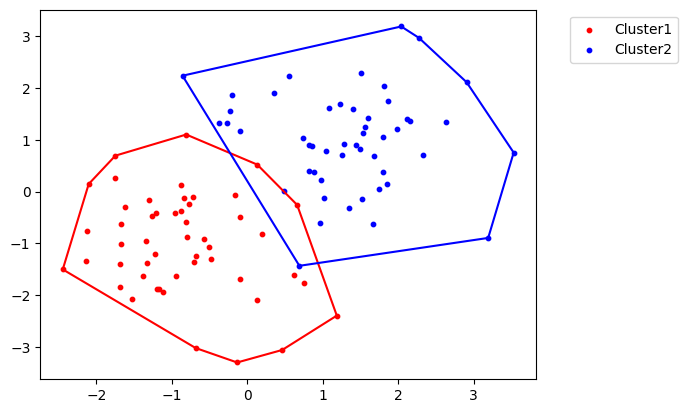

In [8]:
# Get the convex hull for cluster_a and plot cluster_a
hull_a = ConvexHull(cluster_a)
plt.scatter(cluster_a[:, 0], cluster_a[:, 1], s=10, color="red", label="Cluster1")

# Plot the convex hull boundaries for cluster_a
for j in hull_a.simplices:
    plt.plot(cluster_a[j,0], cluster_a[j,1], 'red')


# Get the convex hull for cluster_b and plot cluster_b
hull_b = ConvexHull(cluster_b)
plt.scatter(cluster_b[:, 0], cluster_b[:, 1], s=10, color="blue", label="Cluster2")


# Plot the convex hull boundaries for cluster_b
for j in hull_b.simplices:
    plt.plot(cluster_b[j,0], cluster_b[j,1], 'blue')

plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

For a non-linearly separable dataset, the convex hull of the two clusters intersect, which is what you should be seeing when you generate the graph above.

## Regularization
---
- Techniques used to improve generalization of a model by reducing its
complexity
- Techniques to make a model perform well on test data often at
expense of its performance on training data
- Avoid overfitting, reduce variance
- Simpler models are preferable: low memory, increase interpretability
- However simpler models may reduce the expressive power of models


### Ridge and Lasso Regularisation

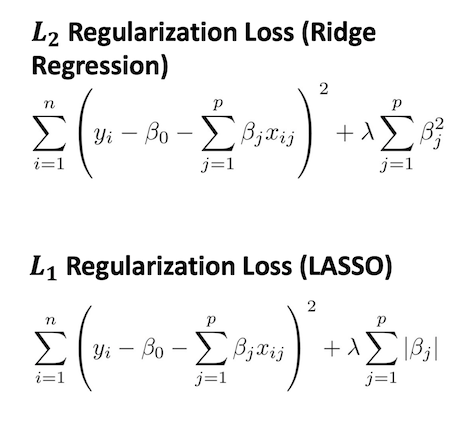

In Sklearn, the Ridge() classifier is used for L2 Regularization and the Lasso() classifier is used for L1 Regularization.

In [ ]:
# loading the required libraries
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [ ]:
# Data loading and train-test split
dataset = datasets.load_diabetes()
train_x, test_x, train_y, test_y = train_test_split(dataset.data,dataset.target,test_size=0.2, shuffle = True, random_state=23)

### Linear Regression with Regularization Exercise

Let's begin with using a Linear Regression model first. We will then use L1, L2 regularization and compare performances.

In [ ]:
from sklearn.linear_model import LinearRegression

# Simple Linear Regression
lr = LinearRegression()
lr.fit(train_x, train_y)
pred_lr = lr.predict(test_x)

mse_score = metrics.mean_squared_error(test_y, pred_lr)
print("MSE for Linear Regression: ", mse_score)

MSE for Linear Regression:  3171.5866192434482


In the following cell, we run through different values for alpha (or lambda) and check the changes in MSE error for each.

For L1 penalty, we have used Sklearn's Lasso model and set the maximum iterations to 10000.

In [ ]:

alpha_values = [1, 0.1, 0.01, 1e-3, 1e-5, 1e-7 ,1e-10]

print("Prediction Errors for LR with L1 penalty")

for alpha in alpha_values:
  # instantiate model
  lr_l1 = sklearn.linear_model.Lasso(alpha = alpha, max_iter = 10000)
  # fit data into model
  lr_l1.fit(train_x, train_y)

  pred_l1 = lr_l1.predict(test_x)
  # append the mse scores into the list
  mse_l1 = metrics.mean_squared_error(test_y, pred_l1)
  print("Alpha:", alpha,", MSE:", mse_l1)

Prediction Errors for LR with L1 penalty
Alpha: 1 , MSE: 3967.9917324120565
Alpha: 0.1 , MSE: 3100.5285280274725
Alpha: 0.01 , MSE: 3140.921482079549
Alpha: 0.001 , MSE: 3165.1521470598022
Alpha: 1e-05 , MSE: 3171.5193465957436
Alpha: 1e-07 , MSE: 3171.585946193343
Alpha: 1e-10 , MSE: 3171.5866185703867


Use L2 regularization for Linear Regression and print the MSE error values for all the given values of alpha.

Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
alpha_values = [1, 0.1, 0.01, 1e-3, 1e-5, 1e-7 ,1e-10]

print("Prediction Errors for LR with L2 penalty")

# TO DO: Use sklearn.linear_model.Ridge to build  L2 regularization model, use max_iter = 10000

for alpha in alpha_values:
  # instantiate model
  lr_l2 = sklearn.linear_model.Ridge(alpha = alpha, max_iter = 10000)
  # fit data into model
  lr_l2.fit(train_x, train_y)

  pred_l2 = lr_l2.predict(test_x)
  # append the mse scores into the list
  mse_l2 = metrics.mean_squared_error(test_y, pred_l2)
  print("Alpha:", alpha,", MSE:", mse_l2)

Prediction Errors for LR with L2 penalty
Alpha: 1 , MSE: 3573.2526842939596
Alpha: 0.1 , MSE: 3123.787596716922
Alpha: 0.01 , MSE: 3140.568053218021
Alpha: 0.001 , MSE: 3162.287032617796
Alpha: 1e-05 , MSE: 3171.4701728955783
Alpha: 1e-07 , MSE: 3171.5854519130794
Alpha: 1e-10 , MSE: 3171.5866180760886


Use L1 and L2 regularization for Linear Regression and print the MSE error values for all the given values of alpha.

Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [ ]:
alpha_values = [1, 0.1, 0.01, 1e-3, 1e-5, 1e-7 ,1e-10]

print("Prediction Errors for LR with L1 and L2 penalty")

# TO DO: Use sklearn.linear_model.ElasticNet to build L1+L2 regularization model, use max_iter = 10000
for alpha in alpha_values:
  lr_l3 = sklearn.linear_model.ElasticNet(alpha = alpha, max_iter = 10000)
  lr_l3.fit(train_x, train_y)
  pred_l3 = lr_l3.predict(test_x)
  mse_l3 = metrics.mean_squared_error(test_y, pred_l3)
  print("Alpha:", alpha,", MSE:", mse_l3)

Prediction Errors for LR with L1 and L2 penalty
Alpha: 1 , MSE: 6271.413547764329
Alpha: 0.1 , MSE: 5679.0496017482865
Alpha: 0.01 , MSE: 3926.4189369047335
Alpha: 0.001 , MSE: 3138.261828273044
Alpha: 1e-05 , MSE: 3157.4341133371568
Alpha: 1e-07 , MSE: 3171.3811462346694
Alpha: 1e-10 , MSE: 3171.5864128689113


## References:

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
